# **Implement Linear Regression using Gradient Descent**

## Import libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Cost function

In [17]:
def compute_cost(X, y, theta):
  m = len(y) # số lượng mẫu
  predictions = X.dot(theta) # dự đoán model
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) # MSE - mất mát
  return cost

```
compute_cost(X, y, theta):
X: ma trận đầu vào (m x n)
y: vector đầu ra (m x 1)
theta: vector tham số (n x 1)
```

## Gradient function

In [18]:
def compute_gradient(X, y, theta):
  m = len(y) # số lượng mẫu
  predictions = X.dot(theta)
  gradients = (1 / m) * X.T.dot(predictions - y)
  return gradients



```
compute_gradient(X, y, theta):
X: ma trận đầu vào (m x n)
y: vector đầu ra (m x 1)
theta: vector tham số (n x 1)
```



## Train function

In [19]:
def train(X, y, theta, learning_rate, iterations):
  cost_history = []
  for i in range(iterations):
    gradients = compute_gradient(X, y, theta)
    theta -= learning_rate * gradients
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)

    # In ra cost mỗi 100 lần lặp
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
  return theta, cost_history



```
X: ma trận đầu vào (m x n)
y: vector đầu ra (m x 1)
theta: vector tham số ban đầu (n x 1)
learning_rate: tốc độ học
iterations: số lần lặp
```



## Prepare data

In [20]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Thêm cột bias (cột 1) vào X
X_b = np.c_[np.ones((100, 1)), X]

## Train model

In [21]:
# Khởi tạo tham số
theta_initial = np.zeros((2, 1))  # vector 2x1 cho tham số
learning_rate = 0.1
iterations = 1000

# Huấn luyện mô hình
theta_optimal, cost_history = train(X_b, y, theta_initial, learning_rate, iterations)
print("Optimal theta:", theta_optimal)

Iteration 0: Cost 17.009012244814418
Iteration 100: Cost 0.5005024082800785
Iteration 200: Cost 0.49638619229064673
Iteration 300: Cost 0.49622582549702926
Iteration 400: Cost 0.49621957764498226
Iteration 500: Cost 0.49621933423015613
Iteration 600: Cost 0.49621932474677244
Iteration 700: Cost 0.49621932437730204
Iteration 800: Cost 0.4962193243629075
Iteration 900: Cost 0.4962193243623467
Optimal theta: [[4.222151  ]
 [2.96846758]]


## Visualization

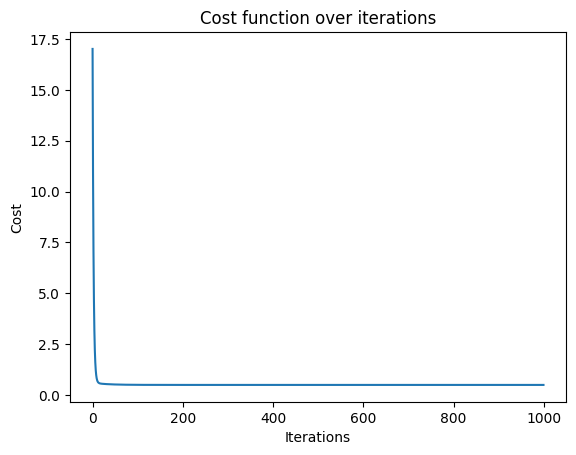

In [22]:
# Vẽ đồ thị hàm mất mát
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function over iterations")
plt.show()

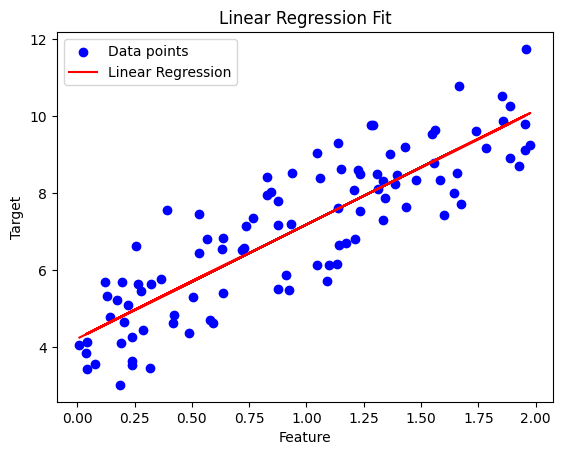

In [23]:
# Vẽ dữ liệu và đường hồi quy tuyến tính
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, X_b.dot(theta_optimal), color="red", label="Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()